<a href="https://colab.research.google.com/github/stemgene/Computer-Vision-Projects/blob/main/OpenCV_ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/channel/UCinHMAnLqwggMqKLes1EsaA/videos

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

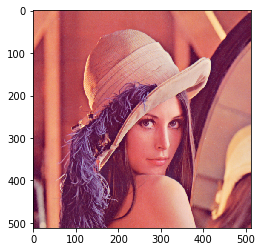

In [ ]:
src = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/lena.tiff") # B,G,R
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)

## Color Space

In [ ]:
image = src.copy()
print(type(image))
print(image.shape)
print(image.size)
print(image.dtype)
pixel_data = np.array(image)
print(pixel_data)
print(pixel_data.shape)

<class 'numpy.ndarray'>
(512, 512, 3)
786432
uint8
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]
(512, 512, 3)


#### Calculate pixels value --inverse the image

(512, 512, 3)
time: 2292.153837


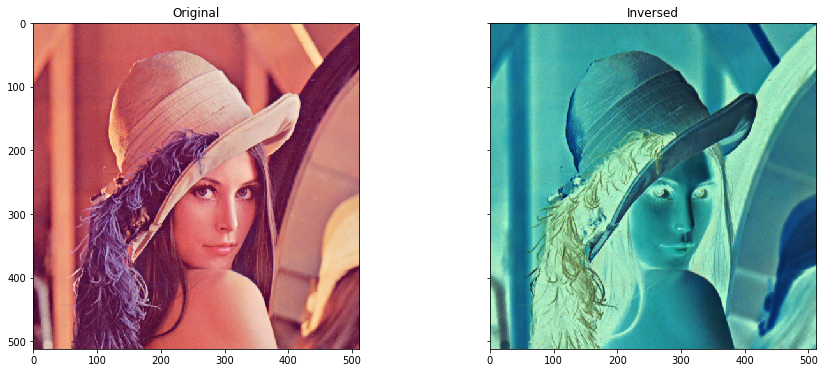

In [ ]:
image = src.copy()
print(image.shape)
height = image.shape[0]
width = image.shape[1]
channels = image.shape[2]
t1 = cv2.getTickCount()
for row in range(height):
    for col in range(width):
        for c in range(channels):
            pv = image[row, col, c]
            image[row, col, c] = 255 - pv # reverse the image

t2 = cv2.getTickCount()
print("time: {}".format((t2-t1)/cv2.getTickFrequency()*1000))
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(src),axs[0].set_title('Original')
axs[1].imshow(image),axs[1].set_title('Inversed')
plt.show()


#### Another and faster way to inverse image

time: 0.683804


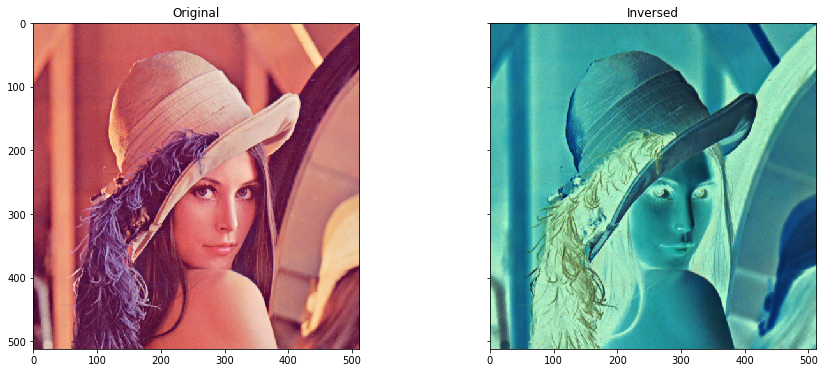

In [ ]:
image = src.copy()
t1 = cv2.getTickCount()
dst = cv2.bitwise_not(image)
t2 = cv2.getTickCount()
print("time: {}".format((t2-t1)/cv2.getTickFrequency()*1000))
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
axs[1].imshow(dst),axs[1].set_title('Inversed')
plt.show()


#### convert Color Space

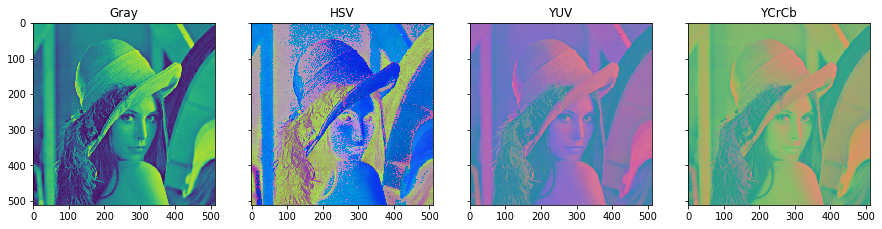

In [ ]:
image = src.copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
Ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
fig, axs = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
axs[0].imshow(gray),axs[0].set_title('Gray')
axs[1].imshow(hsv),axs[1].set_title('HSV')
axs[2].imshow(yuv),axs[2].set_title('YUV')
axs[3].imshow(Ycrcb),axs[3].set_title('YCrCb')
plt.show()


## Optimize image


#### Basic calculation

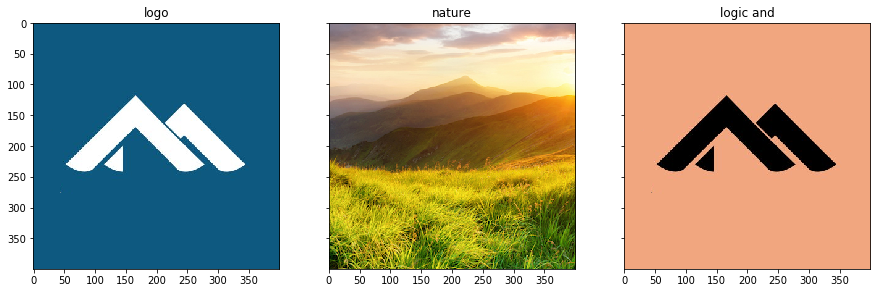

In [ ]:
def add_demo(m1, m2):
  dst = cv2.add(m1, m2)
  axs[2].imshow(dst),axs[2].set_title('addition')

def substract_demo(m1, m2):
  dst = cv2.subtract(m1, m2)
  axs[2].imshow(dst),axs[2].set_title('substract')

def multiply_demo(m1, m2):
  dst = cv2.multiply(m1, m2)
  axs[2].imshow(dst),axs[2].set_title('multiply')

def divide_demo(m1, m2):
  dst = cv2.divide(m1, m2)
  axs[2].imshow(dst),axs[2].set_title('division')

def others(m1, m2):
  avg1 = cv2.mean(m1)
  avg2 = cv2.mean(m2)
  print(avg1)
  print(avg2)

""" -------------Logic-------------- """
def logic_and(m1, m2):
  dst = cv2.bitwise_and(m1, m2)
  axs[2].imshow(dst),axs[2].set_title('logic and')

def logic_or(m1, m2):
  dst = cv2.bitwise_or(m1, m2)
  axs[2].imshow(dst),axs[2].set_title('logic or')

def logic_not(m1):
  dst = cv2.bitwise_not(m1)
  axs[2].imshow(dst),axs[2].set_title('inverse')

src1 = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/logo.png") # B,G,R
src1 = cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)
src2 = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/nature.png") # B,G,R
src2 = cv2.cvtColor(src2, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
axs[0].imshow(src1),axs[0].set_title('logo')
axs[1].imshow(src2),axs[1].set_title('nature')
#add_demo(src1, src2)
#substract_demo(src1, src2)
#divide_demo(src1, src2)
#multiply_demo(src1, src2)
#others(src1, src2)
#logic_and(src1, src2)
#logic_or(src1, src2)
logic_not(src1)
plt.show()

#### bright / contrast

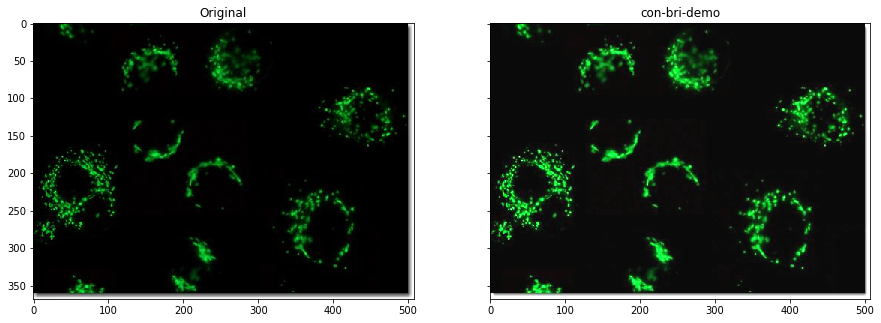

In [ ]:
def contrast_bright(image, c, b): #c: contrast; b: bright
  h, w, ch = image.shape
  blank = np.zeros([h, w, ch], image.dtype)
  dst = cv2.addWeighted(image, c, blank, 1-c, b)
  axs[1].imshow(dst),axs[1].set_title('con-bri-demo')

image = src.copy()
image = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/cell2.jpg")
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
contrast_bright(image, 1.5, 10 )

ROI

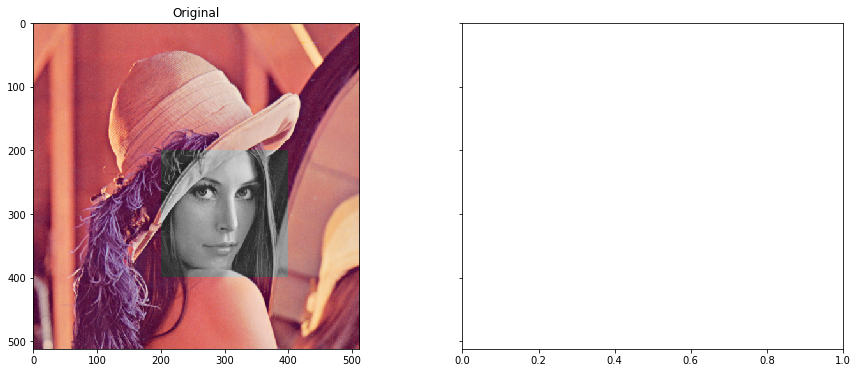

In [ ]:
image = src.copy()
face = image[200:400, 200:400]
gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)  # one dimension
backface = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
image[200:400, 200:400] = backface
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#axs[1].imshow(face),axs[1].set_title('face')
plt.show()

#### fill_color

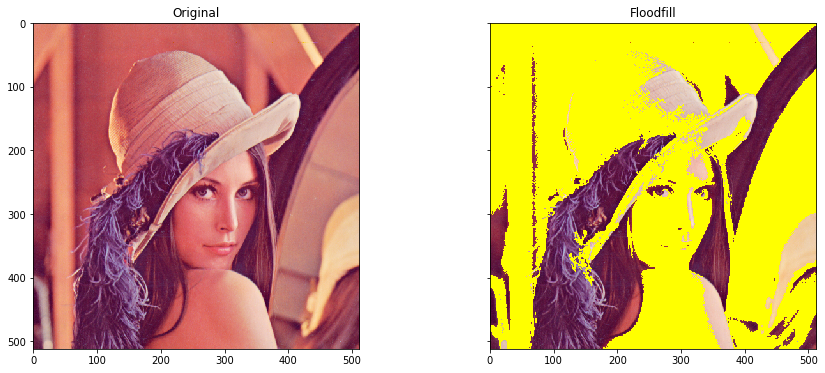

In [ ]:
image = src.copy()
copyImg = image.copy()
h, w = image.shape[:2]
mask = np.zeros([h+2, w+2], np.uint8) # the size of mask must be h+2, w+2
cv2.floodFill(copyImg, mask, (30, 30), (255, 255, 0), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)
#(30, 30) the location of starting to fill
# (100, 100, 100) and (50, 50, 50) are the range of fill range
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
axs[1].imshow(copyImg),axs[1].set_title('Floodfill')
plt.show()

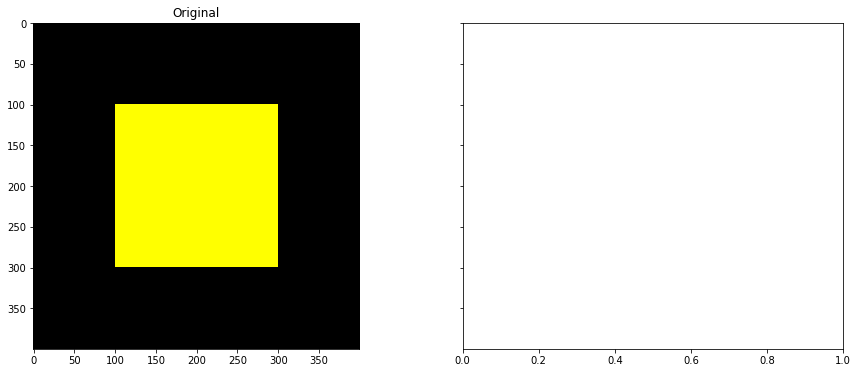

In [ ]:
image = np.zeros([400, 400, 3], np.uint8)
image[100:300, 100:300, :] = 255
mask = np.ones([402, 402, 1], np.uint8) # the size of mask must be h+2, w+2
mask[101:301, 101:301] = 0
fil = cv2.floodFill(image, mask, (200, 200), (255, 255, 0), cv2.FLOODFILL_MASK_ONLY)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#axs[1].imshow(fil),axs[1].set_title('Floodfill')
plt.show()

#### Blur

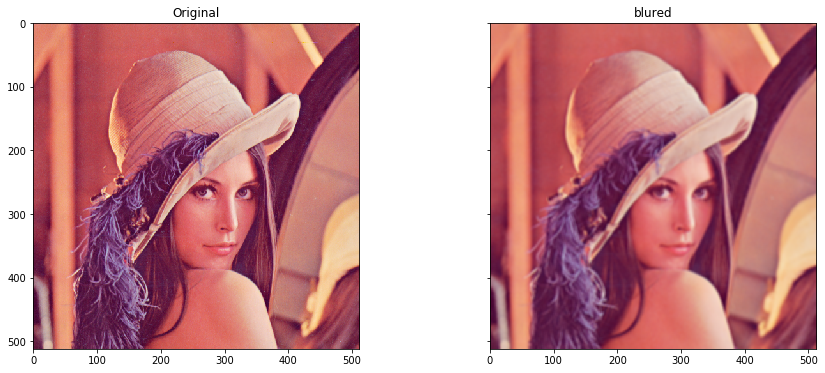

In [ ]:
def blur_mean(image):
  dst = cv2.blur(image, (1, 15)) #(1,15) size of kernel, erect dirction
  axs[1].imshow(dst),axs[1].set_title('mean blured')

def custom_blur(image):
  kernel1 = np.ones([5, 5], np.float32)/25
  kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) # sharpen sum=1 enhancement
  dst = cv2.filter2D(image, -1, kernel=kernel1)
  axs[1].imshow(dst),axs[1].set_title('custom blur')


image = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/salt-and-pepper-noise.png")
image = src
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#blur_median(image)
#blur_mean(image)
custom_blur(image)
plt.show()

#### reduce noise

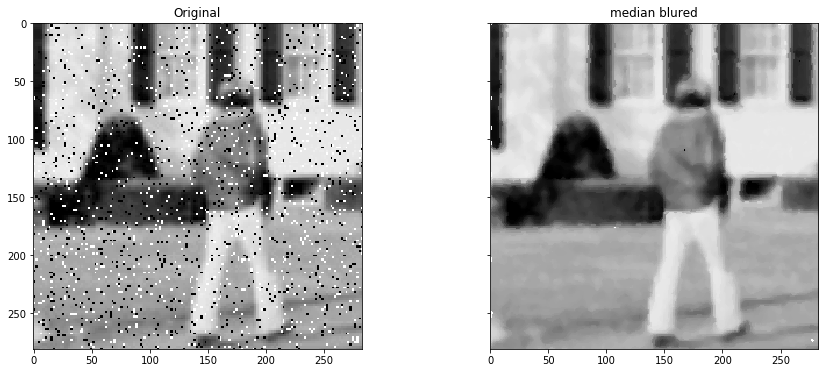

In [ ]:
def clamp(pv):
  if pv > 255:
    return 255
  if pv < 0:
    return 0
  else:
    return pv

def gaussian_noise(image):
  h, w, ch = image.shape
  for row in range(h):
    for col in range(w):
      s = np.random.normal(0, 20, 3)
      r = image[row, col, 0] # red
      g = image[row, col, 1] # green
      b = image[row, col, 2] # blue
      image[row, col, 0] = clamp(r + s[0])
      image[row, col, 1] = clamp(g + s[1])
      image[row, col, 2] = clamp(b + s[2])
      axs[1].imshow(image),axs[1].set_title('noise image')

def gaussian_blur(image):
  blured = cv2.GaussianBlur(image, (0, 0), 10)
  # sigma=10, then it can calculate x, if input kernel size, don't need to input sigma, sigma=0
  axs[1].imshow(blured),axs[1].set_title('Gaussian blur')

# remove salt and pepper noise
def blur_median(image):
  dst = cv2.medianBlur(image, 5)
  axs[1].imshow(dst),axs[1].set_title('median blured')

image = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/salt-and-pepper-noise.png")
#image = src
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#gaussian_noise(image)
#gaussian_blur(image)
blur_median(image)
plt.show()

#### EPF (Edge Preserve Filter)

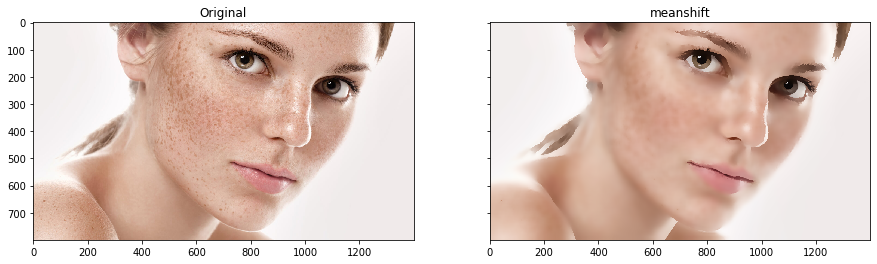

In [ ]:
def bi_demo(image):
  dst = cv2.bilateralFilter(image, 0, 100, 15)
  # 0:distance, be calculated from sigma
  # 100:color sigma greater better to make significant;
  # 15: sigma space small to make kernel simple
  axs[1].imshow(dst),axs[1].set_title('bilateralfilter')

def meanshift(image):
  dst = cv2.pyrMeanShiftFiltering(image, 10, 50)
  axs[1].imshow(dst),axs[1].set_title('meanshift')

image = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/freckles.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = src
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#bi_demo(image)
meanshift(image)
plt.show()

#### contrast enhancement

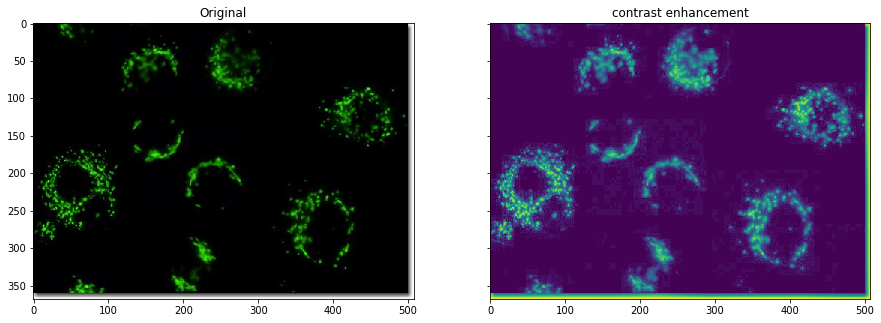

In [ ]:
def equalHist(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  dst = cv2.equalizeHist(gray)
  axs[1].imshow(dst),axs[1].set_title('contrast enhancement')

def clahe(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8))
  dst = clahe.apply(gray)
  axs[1].imshow(dst),axs[1].set_title('contrast enhancement')

image = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/cell2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = src
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#bi_demo(image)
#equalHist(image)
clahe(image)
plt.show()

## Edge

#### Soble

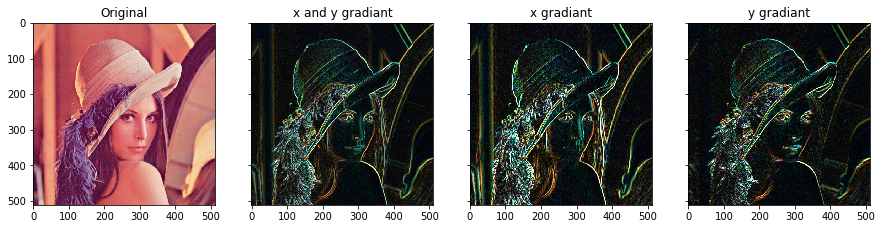

In [ ]:
def sobel(image):
  grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0) #1: dx
  grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1) #1: dy
  gradx = cv2.convertScaleAbs(grad_x) # change to single channel 0-255 image
  grady = cv2.convertScaleAbs(grad_y)
  gradxy = cv2.addWeighted(gradx, 0.5, grady, 0.5, 0)
  axs[1].imshow(gradxy),axs[1].set_title('x and y gradiant')
  axs[2].imshow(gradx),axs[2].set_title('x gradiant')
  axs[3].imshow(grady),axs[3].set_title('y gradiant')


image = src
fig, axs = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
sobel(image)
plt.show()

#### Scharr

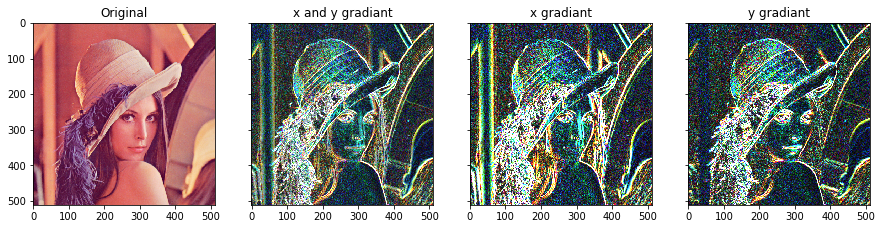

In [ ]:
def lapalcian(image):
  dst = cv2.Laplacian(image, cv.CV_32F)
  lpls = cv2.convertScaleAbs(dst)
  axs[1].imshow(gradxy),axs[1].set_title('x and y gradiant')

def Scharr(image):
  grad_x = cv2.Scharr(image, cv2.CV_32F, 1, 0) #1: dx
  grad_y = cv2.Scharr(image, cv2.CV_32F, 0, 1) #1: dy
  gradx = cv2.convertScaleAbs(grad_x)
  grady = cv2.convertScaleAbs(grad_y)
  gradxy = cv2.addWeighted(gradx, 0.5, grady, 0.5, 0)
  axs[1].imshow(gradxy),axs[1].set_title('x and y gradiant')
  axs[2].imshow(gradx),axs[2].set_title('x gradiant')
  axs[3].imshow(grady),axs[3].set_title('y gradiant')


image = src
fig, axs = plt.subplots(1, 4, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
Scharr(image)
plt.show()

#### Laplacian

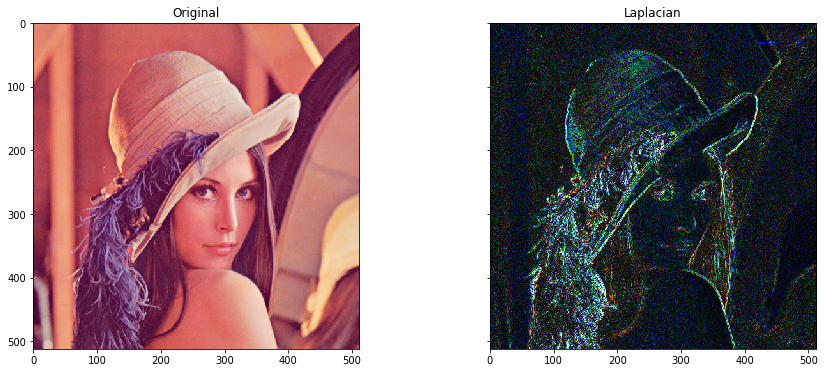

In [ ]:
def laplacian(image):
  dst = cv2.Laplacian(image, cv2.CV_32F)
  lpls = cv2.convertScaleAbs(dst)
  axs[1].imshow(lpls),axs[1].set_title('Laplacian')

def laplacian_custom(image):
  kernel = np.array([[1,1,1], [1,-8,1], [1,1,1]])
  dst = cv2.filter2D(image, cv2.CV_32F, kernel=kernel)
  lpls = cv2.convertScaleAbs(dst)
  axs[1].imshow(lpls),axs[1].set_title('Laplacian')

image = src
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
laplacian_custom(image)
plt.show()

#### Canny

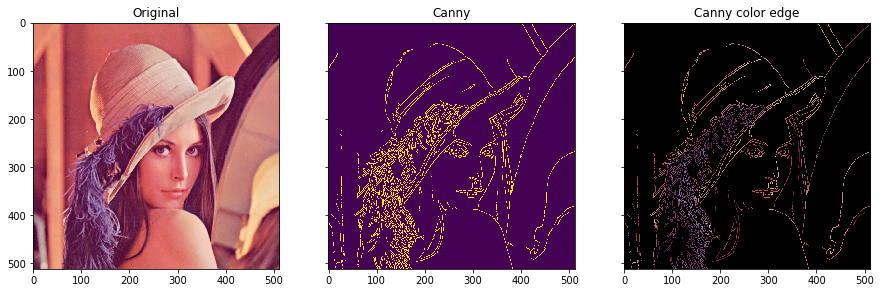

In [ ]:
def edge(image):
  blurred = cv2.GaussianBlur(image,(3,3), 0)
  gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
  # X gradient
  xgrad = cv2.Sobel(gray, cv2.CV_16SC1, 1, 0)
  # Y gradient
  ygrad = cv2.Sobel(gray, cv2.CV_16SC1, 0, 1)
  #edge
  edge_output = cv2.Canny(xgrad, ygrad, 50, 150) # 50, 150: low and high theshold, usually 1:2 or 1:3
  edge_output = cv2.Canny(gray, 50, 150) # also only input gray rather than gradient
  axs[1].imshow(edge_output),axs[1].set_title('Canny')
  # color edge
  dst = cv2.bitwise_and(image, image, mask=edge_output)
  axs[2].imshow(dst),axs[2].set_title('Canny color edge')


image = src
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
edge(image)
plt.show()

#### Hough line detect

![hough](http://zone.ni.com/images/reference/en-XX/help/372916T-01/edge_hough_localize.gif)

![example](http://zone.ni.com/images/reference/en-XX/help/372916T-01/edge_hough01.gif) ![example1](http://zone.ni.com/images/reference/en-XX/help/372916T-01/edge_hough02.gif)

1  Edge Point; 2  Straight Edge;	3  Search Region; 4  Search Line

In [ ]:
def line_detection(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  edges = cv2.Canny(gray, 50, 150, apertureSize=3) #window size for steps of computing gradient, usually equals to 3
  # Houghlines return rho and theta, HoughlinesP return lines
  lines = cv2.HoughLines(edges, 1, np.pi/180, 200) # 1: step size; 200: low value of detecting edge, high value can be computed by low value
  for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+1000*(a))
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*(a))
    cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 2) #2: width
    axs[1].imshow(image),axs[1].set_title('lines')

def line_probability(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  edges = cv2.Canny(gray, 50, 150, apertureSize=3) #window size for steps of computing gradient, usually equals to 3
  # Houghlines return rho and theta, HoughlinesP return lines
  lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=10) #100: length of shortest line
  for line in lines:
    print(type(line))
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 2) #2: width
    axs[1].imshow(image),axs[1].set_title('lines')

image = cv2.imread("/gdrive/My Drive/UR/CSC449/HW1/code/building.jpg")
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(image),axs[0].set_title('Original')
#line_detection(image)
line_probability(image)
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd